<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа №4

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [40]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: уровень преступности на душу населения по городам.
* ZN: доля земли под жилую застройку, предназначенная для участков площадью более 25 000 кв. Футов.
* INDUS: доля акров, не относящихся к розничной торговле, на город.
* CHAS: фиктивная переменная реки Чарльз (она равна 1, если участок ограничивает реку; 0 в противном случае)
* NOX: концентрация оксидов азота (частей на 10 миллионов).
* RM: среднее количество комнат в доме.
* AGE: доля занятых владельцами единиц, построенных до 1940 года.
* DIS: взвешенные расстояния до пяти бостонских центров занятости.
* RAD: индекс доступности радиальных магистралей.
* TAX: полная ставка налога на имущество за 10 000 долларов.
* PTRATIO: соотношение учеников и учителей по городам.
* B: рассчитывается как 1000 (Bk - 0,63) ², где Bk - это доля лиц афроамериканского происхождения по городам.
* LSTAT: процентный более низкий статус населения.
* MEDV: средняя стоимость частных домов в 1000$.

In [41]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url='http://yustiks.ru/dataset/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(url,  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



CHAS


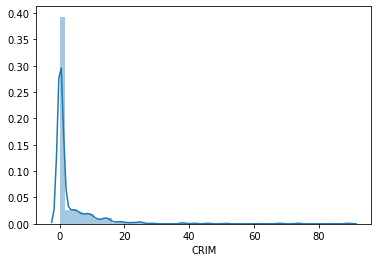

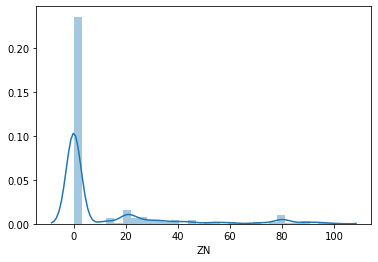

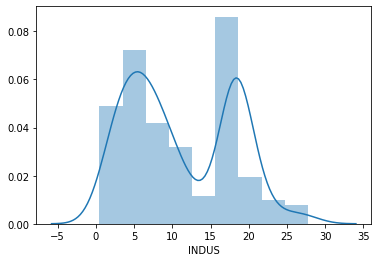

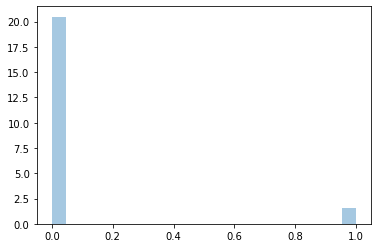

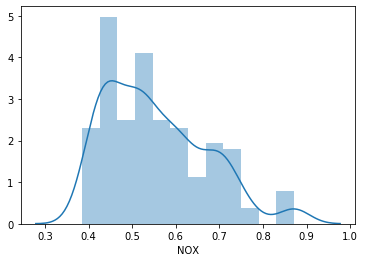

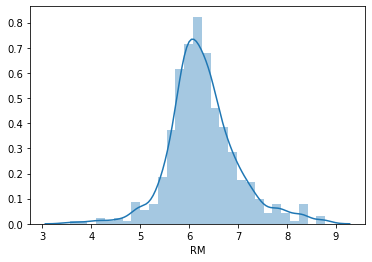

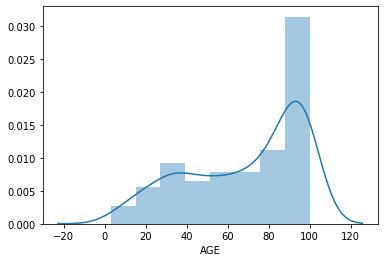

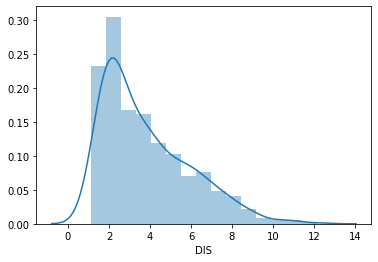

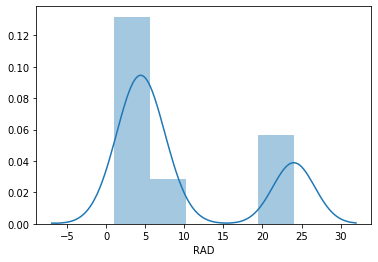

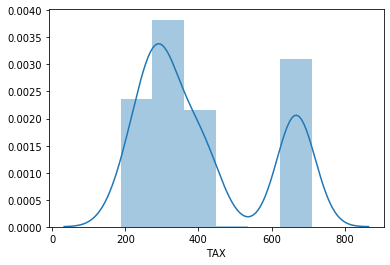

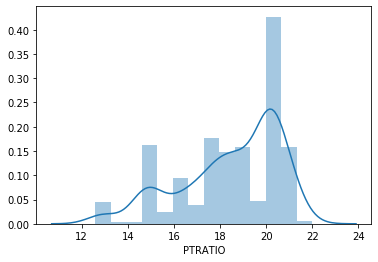

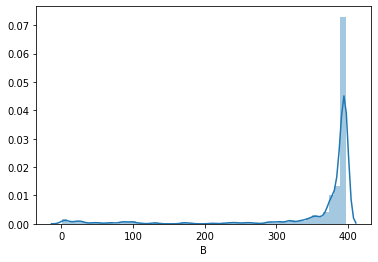

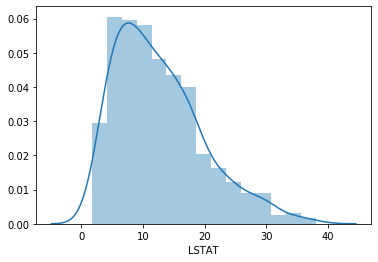

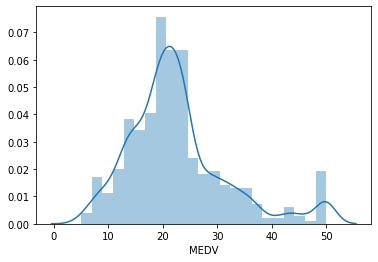

In [42]:
# Пройдем в цикле по всем колонкам и нарисуем частотные графики для каждого
for x in data.columns:
    try:
        plt.subplots()
        sns.distplot(data[x])
    except:
        print(x)

In [25]:
# Распределения для графиков:
# CRIM - Логнормальное
# ZN - Логнормальное
# INDUS - 
# CHAS - Бернулли
# NOX - Вейбулла
# RM - Нормальное
# AGE - Бета
# DIS - Вейбулла
# RAD - Биноминальное
# TAX - Биноминальное
# PTRATIO - Вейбулла
# B - Логнормальное
# LSTAT - Гамма
# MEDV - Вейбулла

Построить матрицу корреляций для данной таблицы и выбрать максимально коррелирующий атрибут (несколько атрибутов) с ценой на дома (MEDV атрибут).

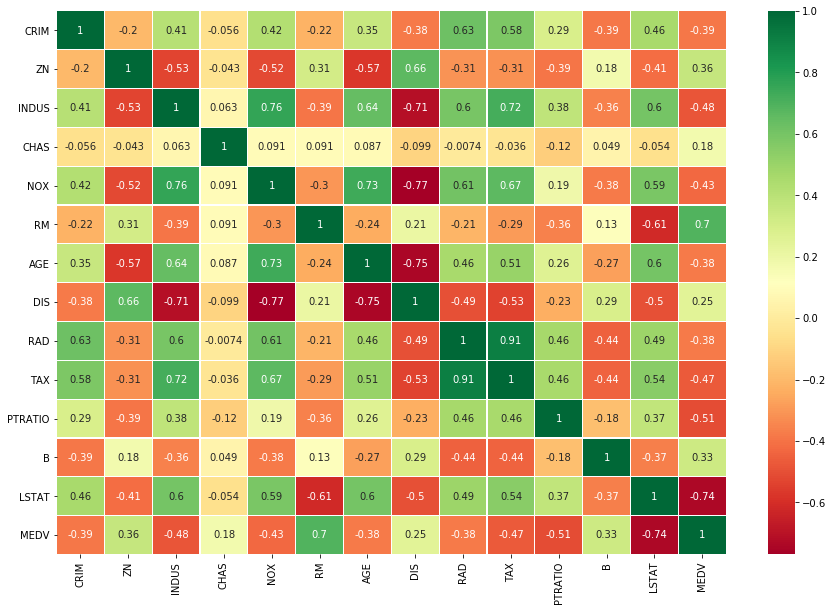

In [43]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.show()

In [34]:
# Самые коррелирующие атрибуты для MEDV (средняя стоимость частных домов):
# LSTAT = -0,74 - низкий статус населения обратно пропорционален стоимости домов
# PTRATIO = -0,51 - соотношение учеников и учителей по городам обратно пропорционален стоимости домов
# TAX = -0,47 - налог на имущество обратно пропорционален стоимости домов

Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 



1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии



Среднеквадратичная ошибка: 27.965118053112928
Средняя абсолютная ошибка: 3.7318090145025478


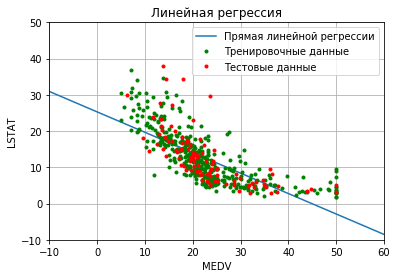

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

medv = np.array(data['MEDV']).reshape(-1,1)
lstat = np.array(data['LSTAT']).reshape(-1,1)

model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split( # разделим данные на 80% тренировочных, 20% тестовых
    medv,
    lstat,
    test_size = 0.2
)
model.fit(X_train, y_train) # обучим модель
predicted_y = model.predict(X_test) # предсказания модели на тестируемых данных

print('Среднеквадратичная ошибка:',mean_squared_error(predicted_y, y_test)) # Посчитаем ошибки модели
print('Средняя абсолютная ошибка:',mean_absolute_error(predicted_y, y_test))

plt.xlabel('MEDV')
plt.ylabel('LSTAT')
plt.title('Линейная регрессия')
x = np.linspace(-10, 60, 100) # Создадим 100 точек для предсказаний
y = model.coef_ * x + model.intercept_ # y = kx + b
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, '.', color='g')
plt.plot(X_test, y_test, '.', color='r')
plt.xlim(-10,60)
plt.ylim(-10,50)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.grid()
plt.show()

Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [112]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop).

Сколько стран в выборке? Написать ответ. 

Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

Смоделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?